c:\Users\leona\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


24
24


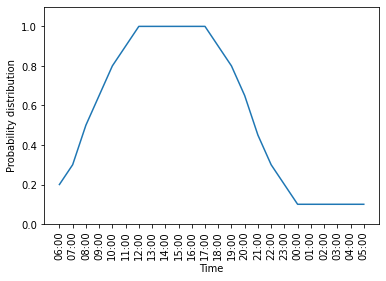

In [1]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

demand = [0.2,0.3,0.5,0.65,0.8,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.65,0.45,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
hour = ["06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00","00:00","01:00","02:00","03:00","04:00","05:00"]
print(len(demand))
print(len(hour))

plt.plot(hour,demand)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Probability distribution')
plt.title('')
plt.ylim([0.0,1.1])
#plt.tight_layout()
#plt.savefig('Prob-dist.png', format = 'png' )
plt.show()

Less : ratio (cp : inventory) 1:3 charging size = 6; inv size = 18 (40-45 seems like)
random : 4 ratio (cp : inventory) 1:3 charging size = 6; inv size = 18 (40-45 seems like)

Normal : ratio (cp : inventory) 1:3 charging size = 6; inv size = 18 (40-45 seems like)

In [12]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 4

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
temp_ = 0
n = 0
while temp_ < 45 : 
    n += 1
    print('perkalian ratio',n)
    inv_size = ratio*n
    cp_size = int(np.ceil(inv_size/ratio))
    model = switching_model(num_of_motorist=50,num_of_stations=4,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="more", demand = demand)

    for i in range(num_of_step):
        model.step()
    model_data = model.datacollector.get_model_vars_dataframe()
    temp_ = model_data["num_of_alive"].iloc[-1]
    print(temp_)



perkalian ratio 1
9
9
7
perkalian ratio 2
9
9
27
perkalian ratio 3
9
9
44
perkalian ratio 4
9
9
50


In [18]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3
inv_size = ratio*4
cp_size = int(np.ceil(inv_size/ratio))-2
model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="normal", demand = demand)

#Dalam menit
days = 14
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()
model_data = model.datacollector.get_model_vars_dataframe()
model_data["num_of_alive"].iloc[-1]

9
9


30

In [16]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data["num_of_alive"].iloc[-1]

34

In [11]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position       Charge Alive  Full_battery  Empty_battery  \
Step AgentID                                                            
0    0           None  2427.798140  None           NaN            NaN   
     1           None  2482.318684  None           NaN            NaN   
     2           None  1426.291612  None           NaN            NaN   
     3           None  2457.331399  None           NaN            NaN   
     4           None   840.652982  None           NaN            NaN   

              CP_full  CP_empty  
Step AgentID                     
0    0            NaN       NaN  
     1            NaN       NaN  
     2            NaN       NaN  
     3            NaN       NaN  
     4            NaN       NaN

In [9]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
114    False
115     True
116    False
117    False
118    False
119    False
120     True
121     True
122    False
123    False
124     True
125    False
126    False
127    False
128    False
129    False
130    False
131     True
132     True
133     True
134    False
135     True
136    False
137     True
138     True
139    False
140     True
141    False
142    False
143     True
144    False
145    False
146    False
147     True
148     True
149    False
150     True
151     True
152     True
153    False
154     True
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162     True
163     True
Name: Alive, dtype: object

In [10]:
agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
164      (5, 5)
165     (5, 17)
166     (5, 30)
167     (5, 42)
168     (17, 5)
169    (17, 17)
170    (17, 30)
171    (17, 42)
172     (30, 5)
173    (30, 17)
174    (30, 30)
175    (30, 42)
176     (42, 5)
177    (42, 17)
178    (42, 30)
179    (42, 42)
Name: Position, dtype: object


In [11]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
164    3.0
165    3.0
166    3.0
167    3.0
168    3.0
169    3.0
170    3.0
171    3.0
172    3.0
173    3.0
174    3.0
175    3.0
176    3.0
177    3.0
178    3.0
179    2.0
Name: Full_battery, dtype: float64


In [12]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
164    0.0
165    0.0
166    0.0
167    0.0
168    0.0
169    0.0
170    0.0
171    0.0
172    0.0
173    0.0
174    0.0
175    0.0
176    0.0
177    0.0
178    0.0
179    1.0
Name: Empty_battery, dtype: float64


In [13]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
164    1.0
165    1.0
166    1.0
167    1.0
168    1.0
169    1.0
170    1.0
171    1.0
172    1.0
173    1.0
174    1.0
175    1.0
176    1.0
177    1.0
178    1.0
179    0.0
Name: CP_full, dtype: float64


In [14]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
164    0.0
165    0.0
166    0.0
167    0.0
168    0.0
169    0.0
170    0.0
171    0.0
172    0.0
173    0.0
174    0.0
175    0.0
176    0.0
177    0.0
178    0.0
179    1.0
Name: CP_empty, dtype: float64


In [15]:
#Ambil data motorist
driver_num = 0
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
20155    (5, 12)
20156    (5, 12)
20157    (5, 12)
20158    (5, 12)
20159    (5, 12)
Name: Position, dtype: object

Text(0, 0.5, 'y')

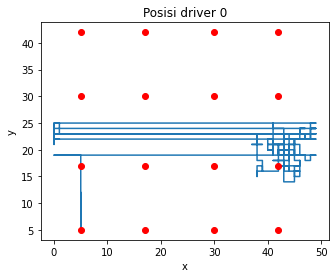

In [16]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

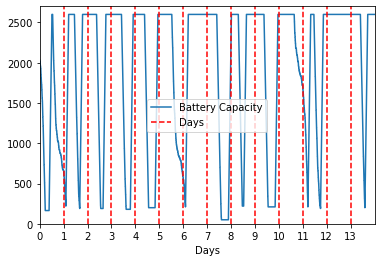

In [17]:
#Cek baterai
battery_id = 8
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [18]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
20155,20,1
20156,20,1
20157,20,1
20158,20,1
20159,20,1


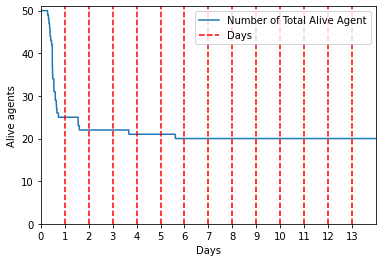

In [19]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,num_of_motorist + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

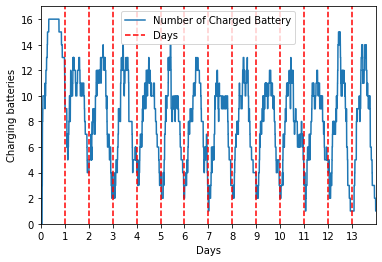

In [20]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Charged Battery','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [21]:
#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

440954


In [22]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

440954


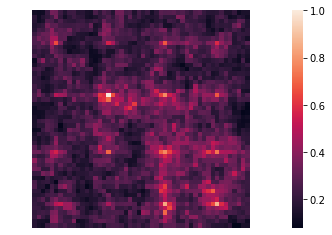

In [23]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
#ax.set_xlabel('x')
#ax.set_ylabel('y')   

# Heat_map

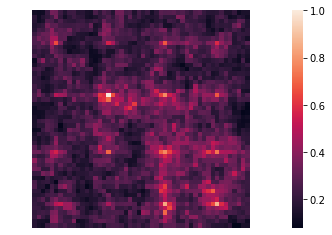

In [39]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data)
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
#ax.set_xlabel('x')
#ax.set_ylabel('y')   

# Boxplot

In [ ]:
sengaja-error

In [34]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50
ratio = 3 
inv_size = ratio
cp_size = int(np.ceil(inv_size/ratio))
config_ = ['less','normal','more']
days = 14
num_of_step = days*24*60
#num_of_step = 100
df_ = {
    'moore' : [],
    'num_alive' : [[],[],[]]
}

for i in range(len(config_)):
    df_['moore'].append(config_[i])
    for j in range(10):
        model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration=config_[i], demand = demand)

        for k in range(num_of_step):
            model.step()
            
        model_data = model.datacollector.get_model_vars_dataframe()
        df_['num_alive'][i].append(model_data["num_of_alive"].iloc[-1])

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


In [36]:
import pandas as pd 
box_ = pd.DataFrame(columns = config_)
for i in range(len(config_)):
    box_[config_[i]] = df_['num_alive'][i]

<AxesSubplot:>

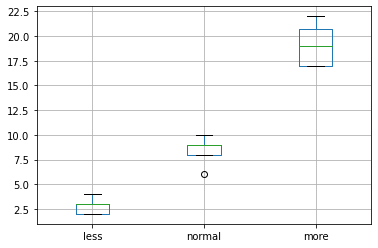

In [38]:
box_.boxplot()